# Import Packages for EDA

We chose the following packages to conduct our EDA.

In [1]:
import psycopg2
import pandas as pd
import pandas.io.sql as pd_sql
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as mn
import os

from pandas.plotting import scatter_matrix

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Connect to AWS Server

Use username and password to connect to server.

In [2]:
def connectDB(DB):
    # connect to the PostgreSQL server
    return psycopg2.connect(
        database=DB,
        user="postgres",
        password="Georgetown16",
        host="database-1.c5vispb5ezxg.us-east-1.rds.amazonaws.com",
        port='5432')

def disconnectDB():
    cur.close()
    conn.close()


In [3]:
conn = connectDB("Dataset")

# extract everything from 'table_name' into a dataframe
df = pd_sql.read_sql(f"select * from public.\"featureSTG\" ", con=conn)
df_missing_values = pd_sql.read_sql(f"select * from public.\"analysisDataset\" ", con=conn)
#code to be able to view all the columns in pandas dataframe
pd.set_option('display.max_columns', 50)

#check to see the correct table was imported
df.head()  

level_0  index  id_student  module_domain  module_presentation_length  \
0        0      0        3733              1                         261   
1        1      1        6516              0                         269   
2        2      2        8462              1                         261   
3        3      3        8462              1                         262   
4        4      4       11391              0                         268   

   term  year  num_of_prev_attempts  final_result  date_registration  \
0     0     0                     0             0              -68.0   
1     0     1                     0             1              -52.0   
2     0     0                     0             0             -137.0   
3     0     1                     1             0              -38.0   
4     0     0                     0             1             -159.0   

   disability  gender  age_band  region  highest_education  imd_band  \
0           0       0         2       3                  3       9.0   
1           0       0         2       0                  3       8.0   
2           0       0         2       2                  3       3.0   
3           0       0         2       2                  3       3.0   
4           0       0         2       1                  3       9.0   

   studied_credits  b4_sum_clicks  q1_sum_clicks  q2_sum_clicks  \
0               60            NaN            NaN            NaN   
1               60          256.0          790.0          389.0   
2               90           81.0          442.0          123.0   
3               60            0.0           10.0            0.0   
4              240           98.0          431.0           99.0   

   q3_sum_clicks  q4_sum_clicks  allclicks  cma_assmt_score  tma_assmt_score  \
0            NaN            NaN        NaN              NaN              NaN   
1          715.0          641.0     2791.0              0.0             63.5   
2            0.0            0.0      646.0              0.0             34.9   
3            0.0            0.0       10.0              0.0             43.0   
4           85.0          221.0      934.0              0.0             82.4   

   tma_cma_assmt_score  final_exam  total_weight  is_reenrolled  \
0                  NaN         NaN           NaN            0.0   
1                 63.5         0.0         100.0            0.0   
2                 34.9         0.0          40.0            0.0   
3                 43.0         0.0          50.0            1.0   
4                 82.4         0.0         100.0            0.0   

   final_exam_score  
0               NaN  
1               0.0  
2               0.0  
3               0.0  
4               0.0

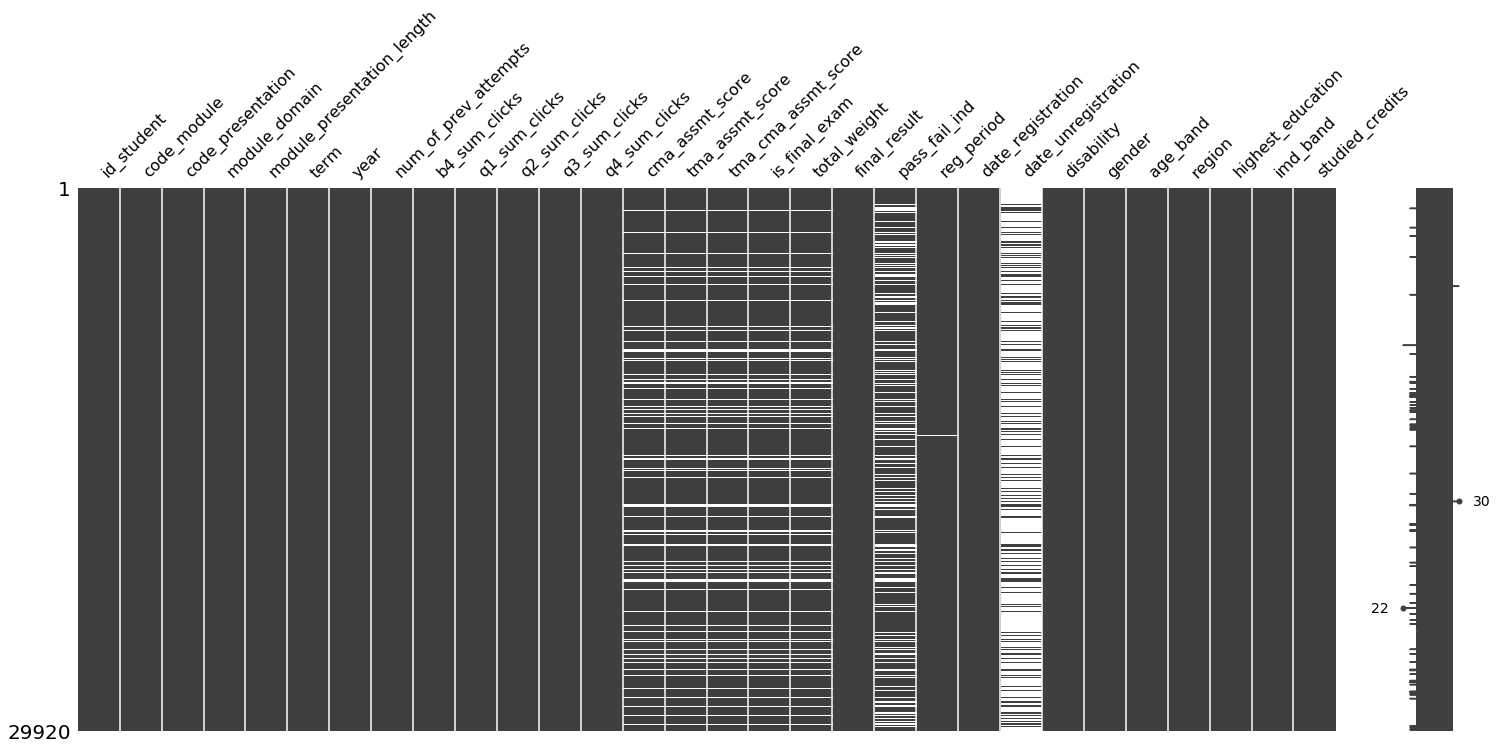

In [4]:
#examine missing values in original dataset called analysisDataset
mn.matrix(df_missing_values)

# Exploratory Data Analysis

In [5]:
#investigate data types of all the files
df.dtypes

level_0                         int64
index                           int64
id_student                      int64
module_domain                   int64
module_presentation_length      int64
term                            int64
year                            int64
num_of_prev_attempts            int64
final_result                    int64
date_registration             float64
disability                      int64
gender                          int64
age_band                        int64
region                          int64
highest_education               int64
imd_band                      float64
studied_credits                 int64
b4_sum_clicks                 float64
q1_sum_clicks                 float64
q2_sum_clicks                 float64
q3_sum_clicks                 float64
q4_sum_clicks                 float64
allclicks                     float64
cma_assmt_score               float64
tma_assmt_score               float64
tma_cma_assmt_score           float64
final_exam  

0     3446
1     3340
2     3216
3     3092
4     2906
5     2582
6     2436
7     2365
8     2111
9     2086
10    2006
11    1823
12    1184
Name: region, dtype: int64


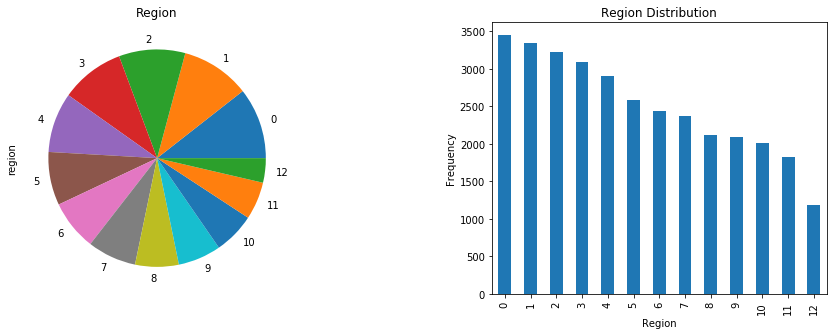

In [6]:
#data distribution of regions
presentation_counts = df['region'].value_counts()
print (presentation_counts)

#created pie chart and histogram chart. Compare both visuals to see which is better at displaying the data.

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
presentation_counts.plot(kind='pie')
plt.title('Region')

plt.subplot(1,2,2)
presentation_counts.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Region Distribution')

# add more space between the two plots
plt.subplots_adjust(wspace=0.5)

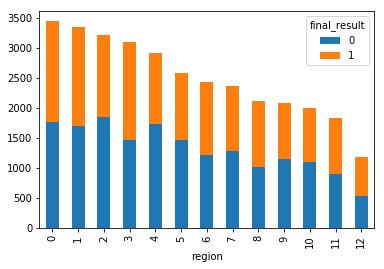

In [7]:
#check pass and fail ratio for students in diffent regions
df.groupby(['region','final_result']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

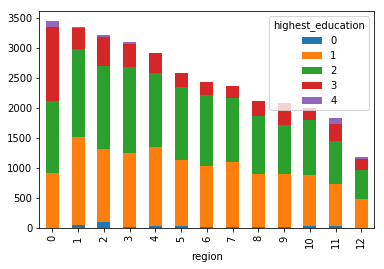

In [8]:
#check out education levels by each region
#df['region', 'highest_education'].counts()
df.groupby(['region','highest_education']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [25]:
#check out counts for gender by each region
df.groupby(['region','gender'])['gender'].count()

region  gender
0       0         2039
        1         1407
1       0         1717
        1         1623
2       0         1703
        1         1513
3       0         1746
        1         1346
4       0         1685
        1         1221
5       0         1400
        1         1182
6       0         1291
        1         1145
7       0         1228
        1         1137
8       0         1105
        1         1006
9       0         1043
        1         1043
10      0         1058
        1          948
11      0         1204
        1          619
12      0          656
        1          528
Name: gender, dtype: int64

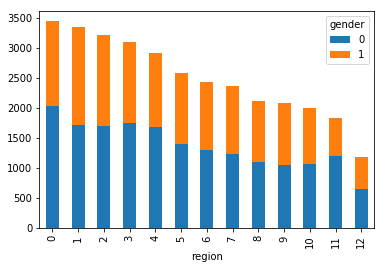

In [24]:
#check out gender by each region
#df['region', 'highest_education'].counts()
df.groupby(['region','gender']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

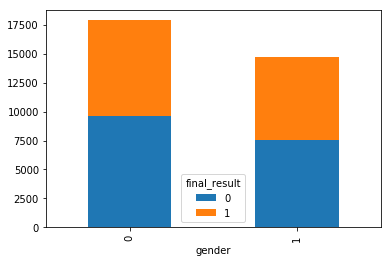

In [26]:
#investigate pass rates based on gender
df.groupby(['gender', 'final_result']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


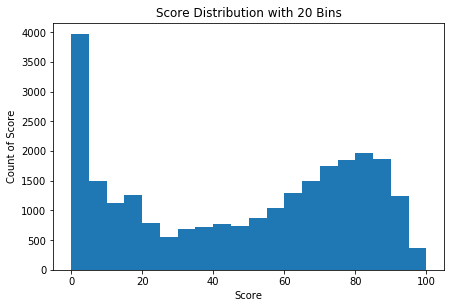

In [27]:
#create bins for score distribution

fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(211)
ax.hist(df['tma_cma_assmt_score'], bins=20, range=(df['tma_cma_assmt_score'].min(),df['tma_cma_assmt_score'].max()))
plt.title('Score Distribution with 20 Bins')
plt.xlabel('Score')
plt.ylabel('Count of Score')
plt.show()

In [ ]:
# extract everything from 'table_name' into a dataframe
df2 = pd_sql.read_sql(f"select * from public.\"studentAssessmentFULLSTG\" ", con=conn).reset_index()
df2.head()  

In [ ]:
#count the number of unique student ids
df['id_student'].count()

In [ ]:
df.head()

In [ ]:
#count the number of semesters
df.groupby(['year', 'term', 'module_domain'])['id_student'].count()

In [ ]:
#count the number of classes
df2['code_module'].nunique()

In [ ]:
#count of null values in chart
df.isnull().sum()

In [ ]:
#distribution of gender based on course genre
df.groupby(['code_module']).count()

In [ ]:
df.head()

In [22]:
df.groupby(['gender', 'module_domain'])['module_domain'].count()

gender  module_domain
0       0                 1843
        1                16032
1       0                 9348
        1                 5370
Name: module_domain, dtype: int64

In [ ]:
df.groupby(['gender', 'module_domain']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [ ]:
df.groupby(['region', 'gender']).size().unstack().plot(kind='bar')
plt.show()

In [ ]:
#semester by gender, the first year is more gender blanaced than the second year
df.groupby(['code_presentation','gender']).size().unstack().plot(kind='bar')
plt.show()

In [ ]:
#number count of the graph above
df.groupby(['code_presentation','gender'])['gender'].count()

In [ ]:
df['code_presentation'].value_counts()

In [ ]:
#class by gender
df.groupby(['code_module', 'gender']).size().unstack().plot(kind='bar')
plt.show()

In [ ]:
#grouping education by gender
df.groupby(['highest_education', 'gender']).size().unstack().plot(kind='bar')
plt.show()

# Scatter Matrix for All the Features in Our Finalized Dataset

In [ ]:
X = df[df.columns.values.tolist()].sample(frac=0.20, replace=False, random_state=1)
#20% of the data for the scatter matrix
scatter_matrix(df, alpha=0.2, figsize=(18,18), diagonal='kde')
plt.show()

In [ ]:
df.head()

In [ ]:
df_test = df[['index','id_student', 'tma_cma_assmt_score', 'code_module', 'code_presentation', 'module_domain', 'final_result']]

In [ ]:
df_test.head()

In [ ]:
scatter_matrix(df_test, alpha=0.2, figsize=(18,18), diagonal='kde')
plt.show()

In [ ]:
ax = df.boxplot("studied_credits","region", figsize=(20,5))

In [ ]:
disconnectDB()